# Task 1

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import phik 
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('Country_data.csv', sep=',')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [2]:
df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [3]:
new_df = pd.concat([df.nunique().rename('Unique'), (df.nunique() / df.shape[0] * 100).rename('%Unique'), df.isnull().sum().rename('Null'), (df.isnull().sum() / df.shape[0] * 100).rename('%Null'), (df == 0).sum().rename('Zero'), ((df == 0).sum() / df.shape[0] * 100).rename('%Zero')], axis=1)
new_df

Unique     %Unique  Null  %Null  Zero  %Zero
country        167  100.000000     0    0.0     0    0.0
child_mort     139   83.233533     0    0.0     0    0.0
exports        147   88.023952     0    0.0     0    0.0
health         147   88.023952     0    0.0     0    0.0
imports        151   90.419162     0    0.0     0    0.0
income         156   93.413174     0    0.0     0    0.0
inflation      156   93.413174     0    0.0     0    0.0
life_expec     127   76.047904     0    0.0     0    0.0
total_fer      138   82.634731     0    0.0     0    0.0
gdpp           157   94.011976     0    0.0     0    0.0

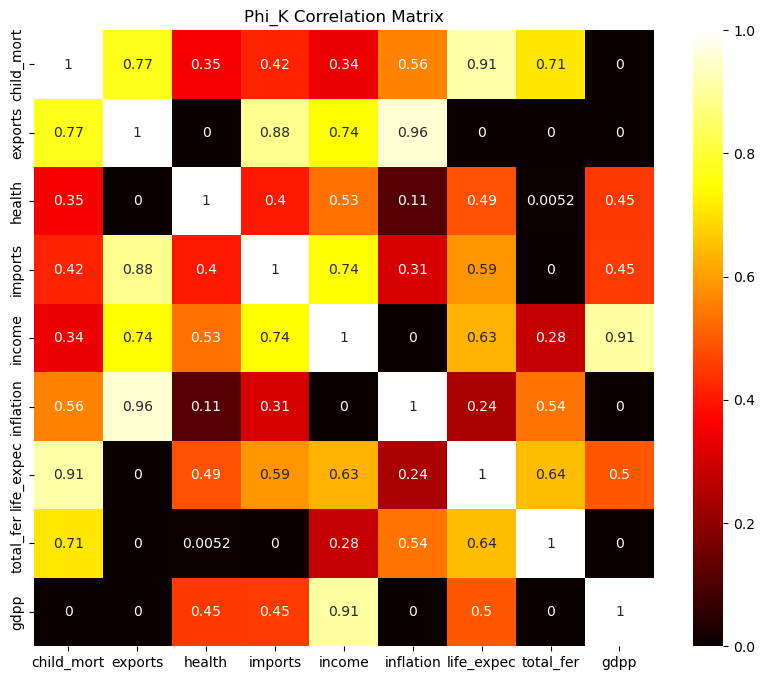

In [4]:
df_ = df.drop(['country'], axis=1)
corr_matrix = df_.phik_matrix(interval_cols=['child_mort', 'export', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='hot')
plt.title('Phi_K Correlation Matrix')
plt.show()

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

sc = StandardScaler()
min_max_sc = MinMaxScaler()
df_sc = pd.DataFrame(sc.fit_transform(df_))
df_mn = pd.DataFrame(min_max_sc.fit_transform(df_))
df_sc.head()

0         1         2         3         4         5         6  \
0  1.291532 -1.138280  0.279088 -0.082455 -0.808245  0.157336 -1.619092   
1 -0.538949 -0.479658 -0.097016  0.070837 -0.375369 -0.312347  0.647866   
2 -0.272833 -0.099122 -0.966073 -0.641762 -0.220844  0.789274  0.670423   
3  2.007808  0.775381 -1.448071 -0.165315 -0.585043  1.387054 -1.179234   
4 -0.695634  0.160668 -0.286894  0.497568  0.101732 -0.601749  0.704258   

          7         8  
0  1.902882 -0.679180  
1 -0.859973 -0.485623  
2 -0.038404 -0.465376  
3  2.128151 -0.516268  
4 -0.541946 -0.041817

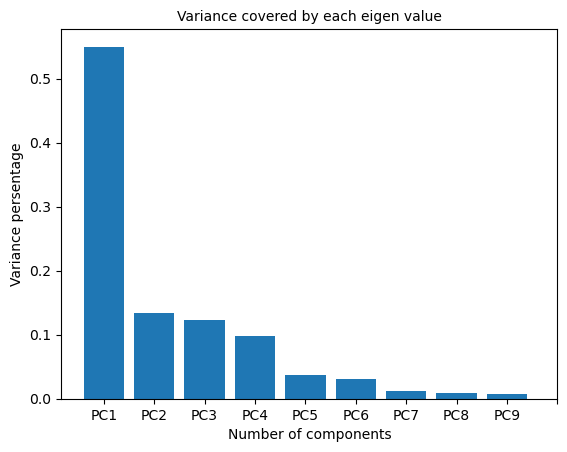

In [6]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_mn))
EVR = pca.explained_variance_ratio_
PCs = []
for i in range (1 , 10):
    PCs.append(f'PC{i}')
    
df_EVR = pd.DataFrame({
    'PCs': PCs ,
    'explained_variance_ratio': EVR
})

df_EVR['Cumulative_Variance'] = df_EVR['explained_variance_ratio'].cumsum()

bars = plt.bar(df_EVR.PCs , df_EVR.explained_variance_ratio)
plt.title('Variance covered by each eigen value', fontsize = 10)
plt.xlabel('Number of components')
plt.xticks (range (0 , 10))
plt.ylabel('Variance persentage') 
plt.show()

pipeline = Pipeline([
    ('scaling', MinMaxScaler()), 
    ('pca', PCA(n_components=5))
])

df_transformed = pd.DataFrame(pipeline.fit_transform(df_))

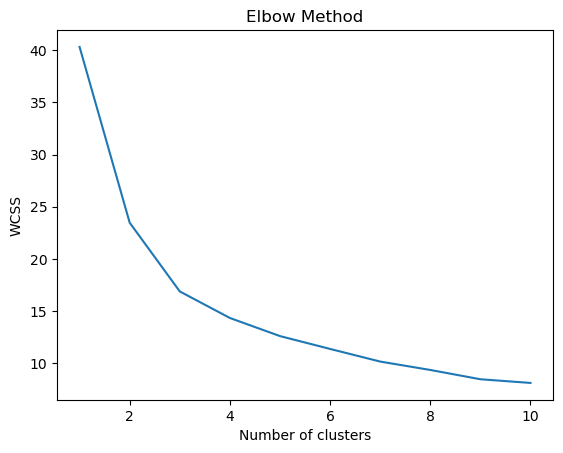

In [7]:
wcss1 = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_transformed)
    wcss1.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

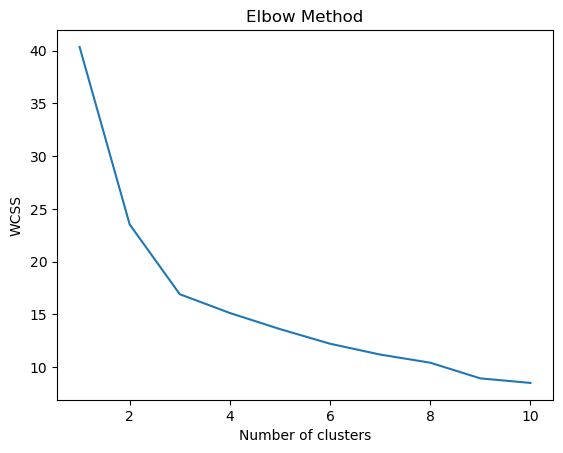

In [8]:
wcss2 = [] 

for i in range(1, 11):
    minikmeans = MiniBatchKMeans(n_clusters=i, random_state=0)
    minikmeans.fit(df_transformed)
    wcss2.append(minikmeans.inertia_)

plt.plot(range(1, 11), wcss2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3).fit_predict(df_transformed)
minikmeans = MiniBatchKMeans(n_clusters=3).fit_predict(df_transformed)
df_['kmeans'] = kmeans
df_['minikmeans'] = minikmeans

In [10]:
summary_df_kmeans = df_.groupby('kmeans').mean()
summary_df_kmeans.drop(['minikmeans'], axis=1, inplace=True)
print(summary_df_kmeans.T)
summary_df_minikmeans = df_.groupby('minikmeans').mean()
summary_df_minikmeans.drop(['kmeans'], axis=1, inplace=True)

kmeans                 0            1             2
child_mort     22.425581    93.284783      4.897143
exports        40.382430    29.287174     58.431429
health          6.215581     6.338478      8.917429
imports        46.932162    43.297826     51.508571
income      12770.813953  3516.804348  45802.857143
inflation       7.609023    12.097065      2.535000
life_expec     72.582558    59.393478     80.245714
total_fer       2.293256     5.090217      1.741143
gdpp         6719.790698  1695.913043  43117.142857


In [11]:
print(summary_df_minikmeans.T)

minikmeans             0            1            2
child_mort     10.691209   110.910714    48.181250
exports        49.372527    27.568571    33.341229
health          7.494725     6.818571     5.526667
imports        49.010989    43.317857    44.953456
income      27429.560440  2992.607143  5901.666667
inflation       5.315165    12.895179     9.475437
life_expec     76.859341    56.696429    66.689583
total_fer       1.869451     5.542143     3.479375
gdpp        21930.329670  1513.500000  2645.333333


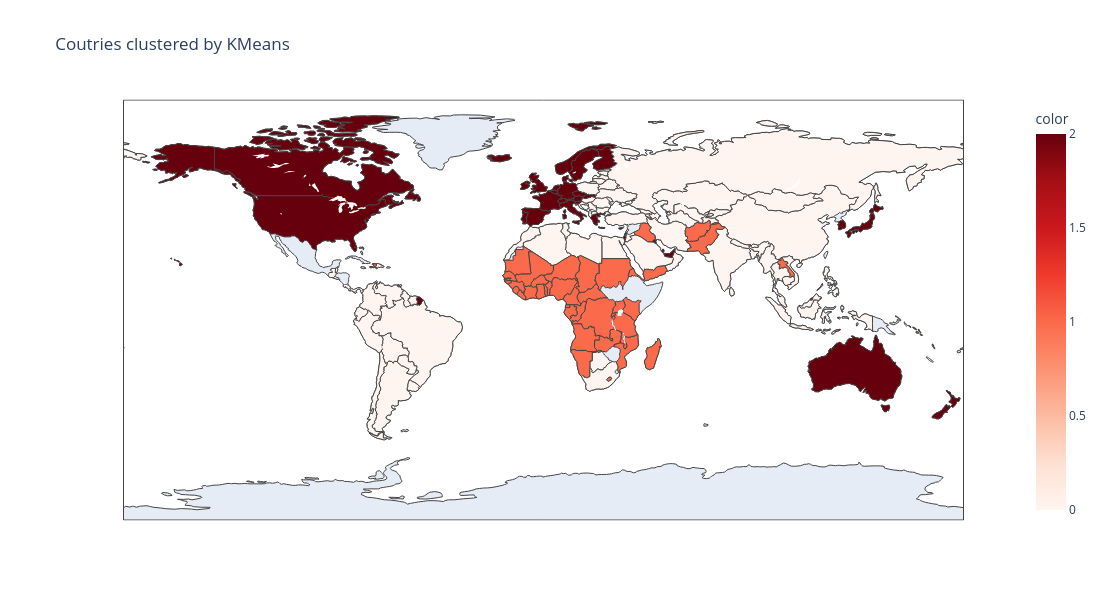

In [12]:
fig = px.choropleth(kmeans,
                    locationmode='country names',
                    locations=df.country,
                    color= df_.kmeans,
                    title='Coutries clustered by KMeans',
                    color_continuous_scale = 'Reds'
                   )

fig.update_layout(autosize=False,
    width=1000,
    height=600,
)

fig.show()

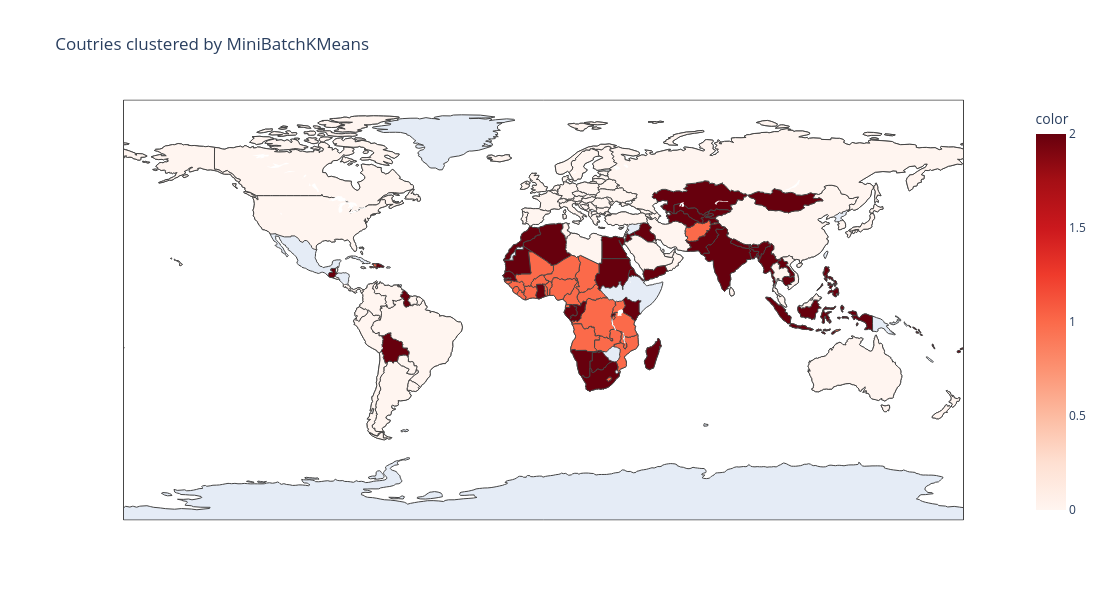

In [13]:
fig = px.choropleth(minikmeans,
                    locationmode='country names',
                    locations=df.country,
                    color= df_.minikmeans,
                    title='Coutries clustered by MiniBatchKMeans',
                    color_continuous_scale = 'Reds'
)

fig.update_layout(autosize=False,
    width=1000,
    height=600,
)

fig.show()

# Task 2

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, roc_curve, auc
from yellowbrick.regressor import ResidualsPlot

In [15]:
target = df.health
df_reg = df.drop(['health', 'country'], axis=1)
df_reg

child_mort  exports  imports  income  inflation  life_expec  total_fer  \
0          90.2     10.0     44.9    1610       9.44        56.2       5.82   
1          16.6     28.0     48.6    9930       4.49        76.3       1.65   
2          27.3     38.4     31.4   12900      16.10        76.5       2.89   
3         119.0     62.3     42.9    5900      22.40        60.1       6.16   
4          10.3     45.5     58.9   19100       1.44        76.8       2.13   
..          ...      ...      ...     ...        ...         ...        ...   
162        29.2     46.6     52.7    2950       2.62        63.0       3.50   
163        17.1     28.5     17.6   16500      45.90        75.4       2.47   
164        23.3     72.0     80.2    4490      12.10        73.1       1.95   
165        56.3     30.0     34.4    4480      23.60        67.5       4.67   
166        83.1     37.0     30.9    3280      14.00        52.0       5.40   

      gdpp  
0      553  
1     4090  
2     4460  
3     3530  
4    12200  
..     ...  
162   2970  
163  13500  
164   1310  
165   1310  
166   1460  

[167 rows x 8 columns]

In [16]:
df_reg_transformed = pd.DataFrame(min_max_sc.fit_transform(df_reg))
tX, vX, tY, vY = train_test_split(df_reg_transformed, target, train_size=0.8, random_state=0)

In [17]:
lr = LinearRegression().fit(tX, tY)
lasso = Lasso(alpha=0.1).fit(tX, tY)
ridge = Ridge(alpha=0.1, solver='svd', max_iter=100).fit(tX, tY)
lr_pred = lr.predict(vX)
lasso_pred = lasso.predict(vX)
ridge_pred = ridge.predict(vX)

In [18]:
print(np.sqrt(mean_squared_error(vY, lr_pred)))
print(np.sqrt(mean_squared_error(vY, lasso_pred)))
print(np.sqrt(mean_squared_error(vY, ridge_pred)))

2.1602116020067146
2.8323396761791075
2.254739466903066


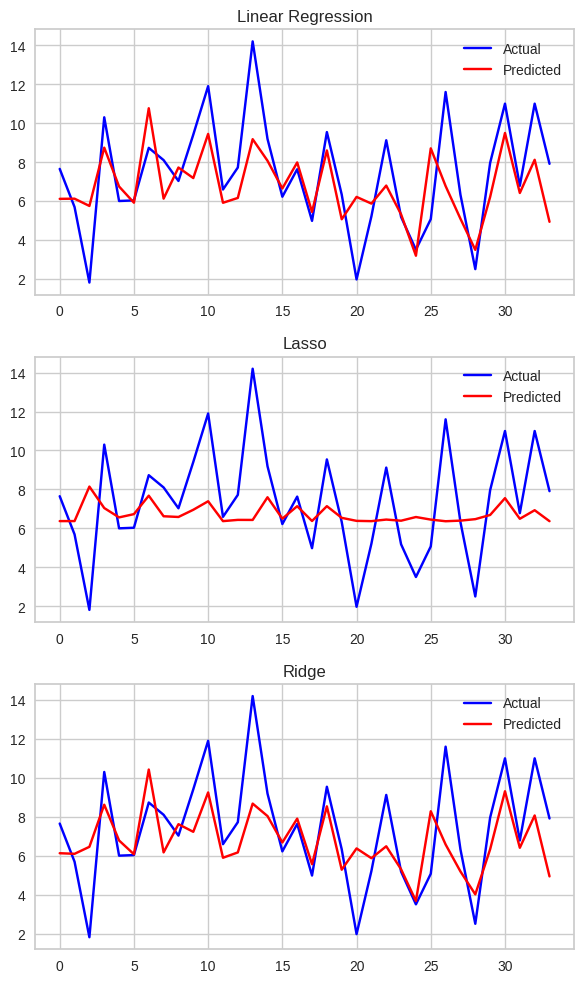

In [19]:
vX = np.array(vX)
vY = np.array(vY)
lr_pred = np.array(lr_pred)
lasso_pred = np.array(lasso_pred)
ridge_pred = np.array(ridge_pred)

samples = np.arange(vY.shape[0])
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(samples, vY, color='blue', label='Actual')
axs[0].plot(samples, lr_pred, color='red', label='Predicted')
axs[0].set_title('Linear Regression')
axs[0].legend()

axs[1].plot(samples, vY, color='blue', label='Actual')
axs[1].plot(samples, lasso_pred, color='red', label='Predicted')
axs[1].set_title('Lasso')
axs[1].legend()

axs[2].plot(samples, vY, color='blue', label='Actual')
axs[2].plot(samples, ridge_pred, color='red', label='Predicted')
axs[2].set_title('Ridge')
axs[2].legend()

plt.tight_layout()
plt.show()

# Task 3

In [20]:
pd.set_option('display.max_columns', None)
df_nasa = pd.read_csv('nasa.csv', sep=',')
df_nasa.head(5)

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
0               0.079051               0.176763            417.388066   
1               0.090762               0.202951            479.225620   
2               0.143849               0.321655            759.521423   
3               0.005469               0.012229             28.876199   
4               0.079051               0.176763            417.388066   

   Est Dia in Feet(max) Close Approach Date  Epoch Date Close Approach  \
0            933.308089          1995-01-01               788947200000   
1           1071.581063          1995-01-01               788947200000   
2           1698.341531          1995-01-08               789552000000   
3             64.569144          1995-01-15               790156800000   
4            933.308089          1995-01-15               790156800000   

   Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  \
0                      6.115834                 22017.003799    13680.509944   
1                     18.113985                 65210.346095    40519.173105   
2                      7.590711                 27326.560182    16979.661798   
3                     11.173874                 40225.948191    24994.839864   
4                      9.840831                 35426.991794    22012.954985   

   Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  \
0                  0.419483         163.178711              62753692.0   
1                  0.383014         148.992630              57298148.0   
2                  0.050956          19.821890               7622911.5   
3                  0.285322         110.990387              42683616.0   
4                  0.407832         158.646713              61010824.0   

   Miss Dist.(miles) Orbiting Body  Orbit ID Orbit Determination Date  \
0         38993336.0         Earth        17      2017-04-06 08:36:37   
1         35603420.0         Earth        21      2017-04-06 08:32:49   
2          4736657.5         Earth        22      2017-04-06 09:20:19   
3         26522368.0         Earth         7      2017-04-06 09:15:49   
4         37910368.0         Earth        25      2017-04-06 08:57:58   

   Orbit Uncertainity  Minimum Orbit Intersection  \
0                   5                    0.025282   
1                   3                    0.186935   
2                   0                    0.043058   
3                   6                    0.005512   
4                   1                    0.034798   

   Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  \
0                        4.634         2458000.5      0.425549   
1                        5.457         2458000.5      0.351674   
2                        4.557         2458000.5      0.348248   
3                        5.093         2458000.5      0.216578   
4                        5.154         2458000.5      0.210448   

   Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0         1.407011     6.025981          314.373913      609.599786   
1         1.107776    28.412996          136.717242      425.869294   
2         1.4

In [21]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [22]:
df_nasa.drop(['Neo Reference ID','Orbit ID','Close Approach Date','Epoch Date Close Approach', 'Orbit Determination Date', \
             'Orbiting Body', 'Equinox'], axis=1, inplace=True)
df_nasa['Hazardous'] = df_nasa['Hazardous'].replace({True: 1, False: 0})
df_nasa

Name  Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0     3703080              21.600            0.127220            0.284472   
1     3723955              21.300            0.146068            0.326618   
2     2446862              20.300            0.231502            0.517654   
3     3092506              27.400            0.008801            0.019681   
4     3514799              21.600            0.127220            0.284472   
...       ...                 ...                 ...                 ...   
4682  3759007              23.900            0.044112            0.098637   
4683  3759295              28.200            0.006089            0.013616   
4684  3759714              22.700            0.076658            0.171412   
4685  3759720              21.800            0.116026            0.259442   
4686  3772978              19.109            0.400641            0.895860   

      Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  \
0            127.219879         284.472297               0.079051   
1            146.067964         326.617897               0.090762   
2            231.502122         517.654482               0.143849   
3              8.801465          19.680675               0.005469   
4            127.219879         284.472297               0.079051   
...                 ...                ...                    ...   
4682          44.111820          98.637028               0.027410   
4683           6.089126          13.615700               0.003784   
4684          76.657557         171.411509               0.047633   
4685         116.025908         259.441818               0.072095   
4686         400.640618         895.859655               0.248946   

      Est Dia in Miles(max)  Est Dia in Feet(min)  Est Dia in Feet(max)  \
0                  0.176763            417.388066            933.308089   
1                  0.202951            479.225620           1071.581063   
2                  0.321655            759.521423           1698.341531   
3                  0.012229             28.876199             64.569144   
4                  0.176763            417.388066            933.308089   
...                     ...                   ...                   ...   
4682               0.061290            144.723824            323.612307   
4683               0.008460             19.977449             44.670934   
4684               0.106510            251.501180            562.373736   
4685               0.161210            380.662441            851.187094   
4686               0.556661           1314.437764           2939.172192   

      Relative Velocity km per sec  Relative Velocity km per hr  \
0                         6.115834                 22017.003799   
1                        18.113985                 65210.346095   
2                         7.590711                 27326.560182   
3                        11.173874                 40225.948191   
4                         9.840831                 35426.991794   
...                            ...                          ...   
4682                     22.154265                 79755.354273   
4683                      3.225150                 11610.539577   
4684                      7.191642                 25889.910626   
4685                     11.352090                 40867.522309   
4686                     35.946852                129408.666253   

      Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  \
0       13680.509944                  0.419483         163.178711   
1       40519.173105                  0.383014         148.992630   
2       16979.661798                  0.050956          19.821890   
3       24994.839864                  0.285322         110.990387   
4       22012.954985                  0.407832         158.646713   
...              ...                       ...                ...   
4682    49556.875548                  0.041361          16.089413 

<AxesSubplot:>

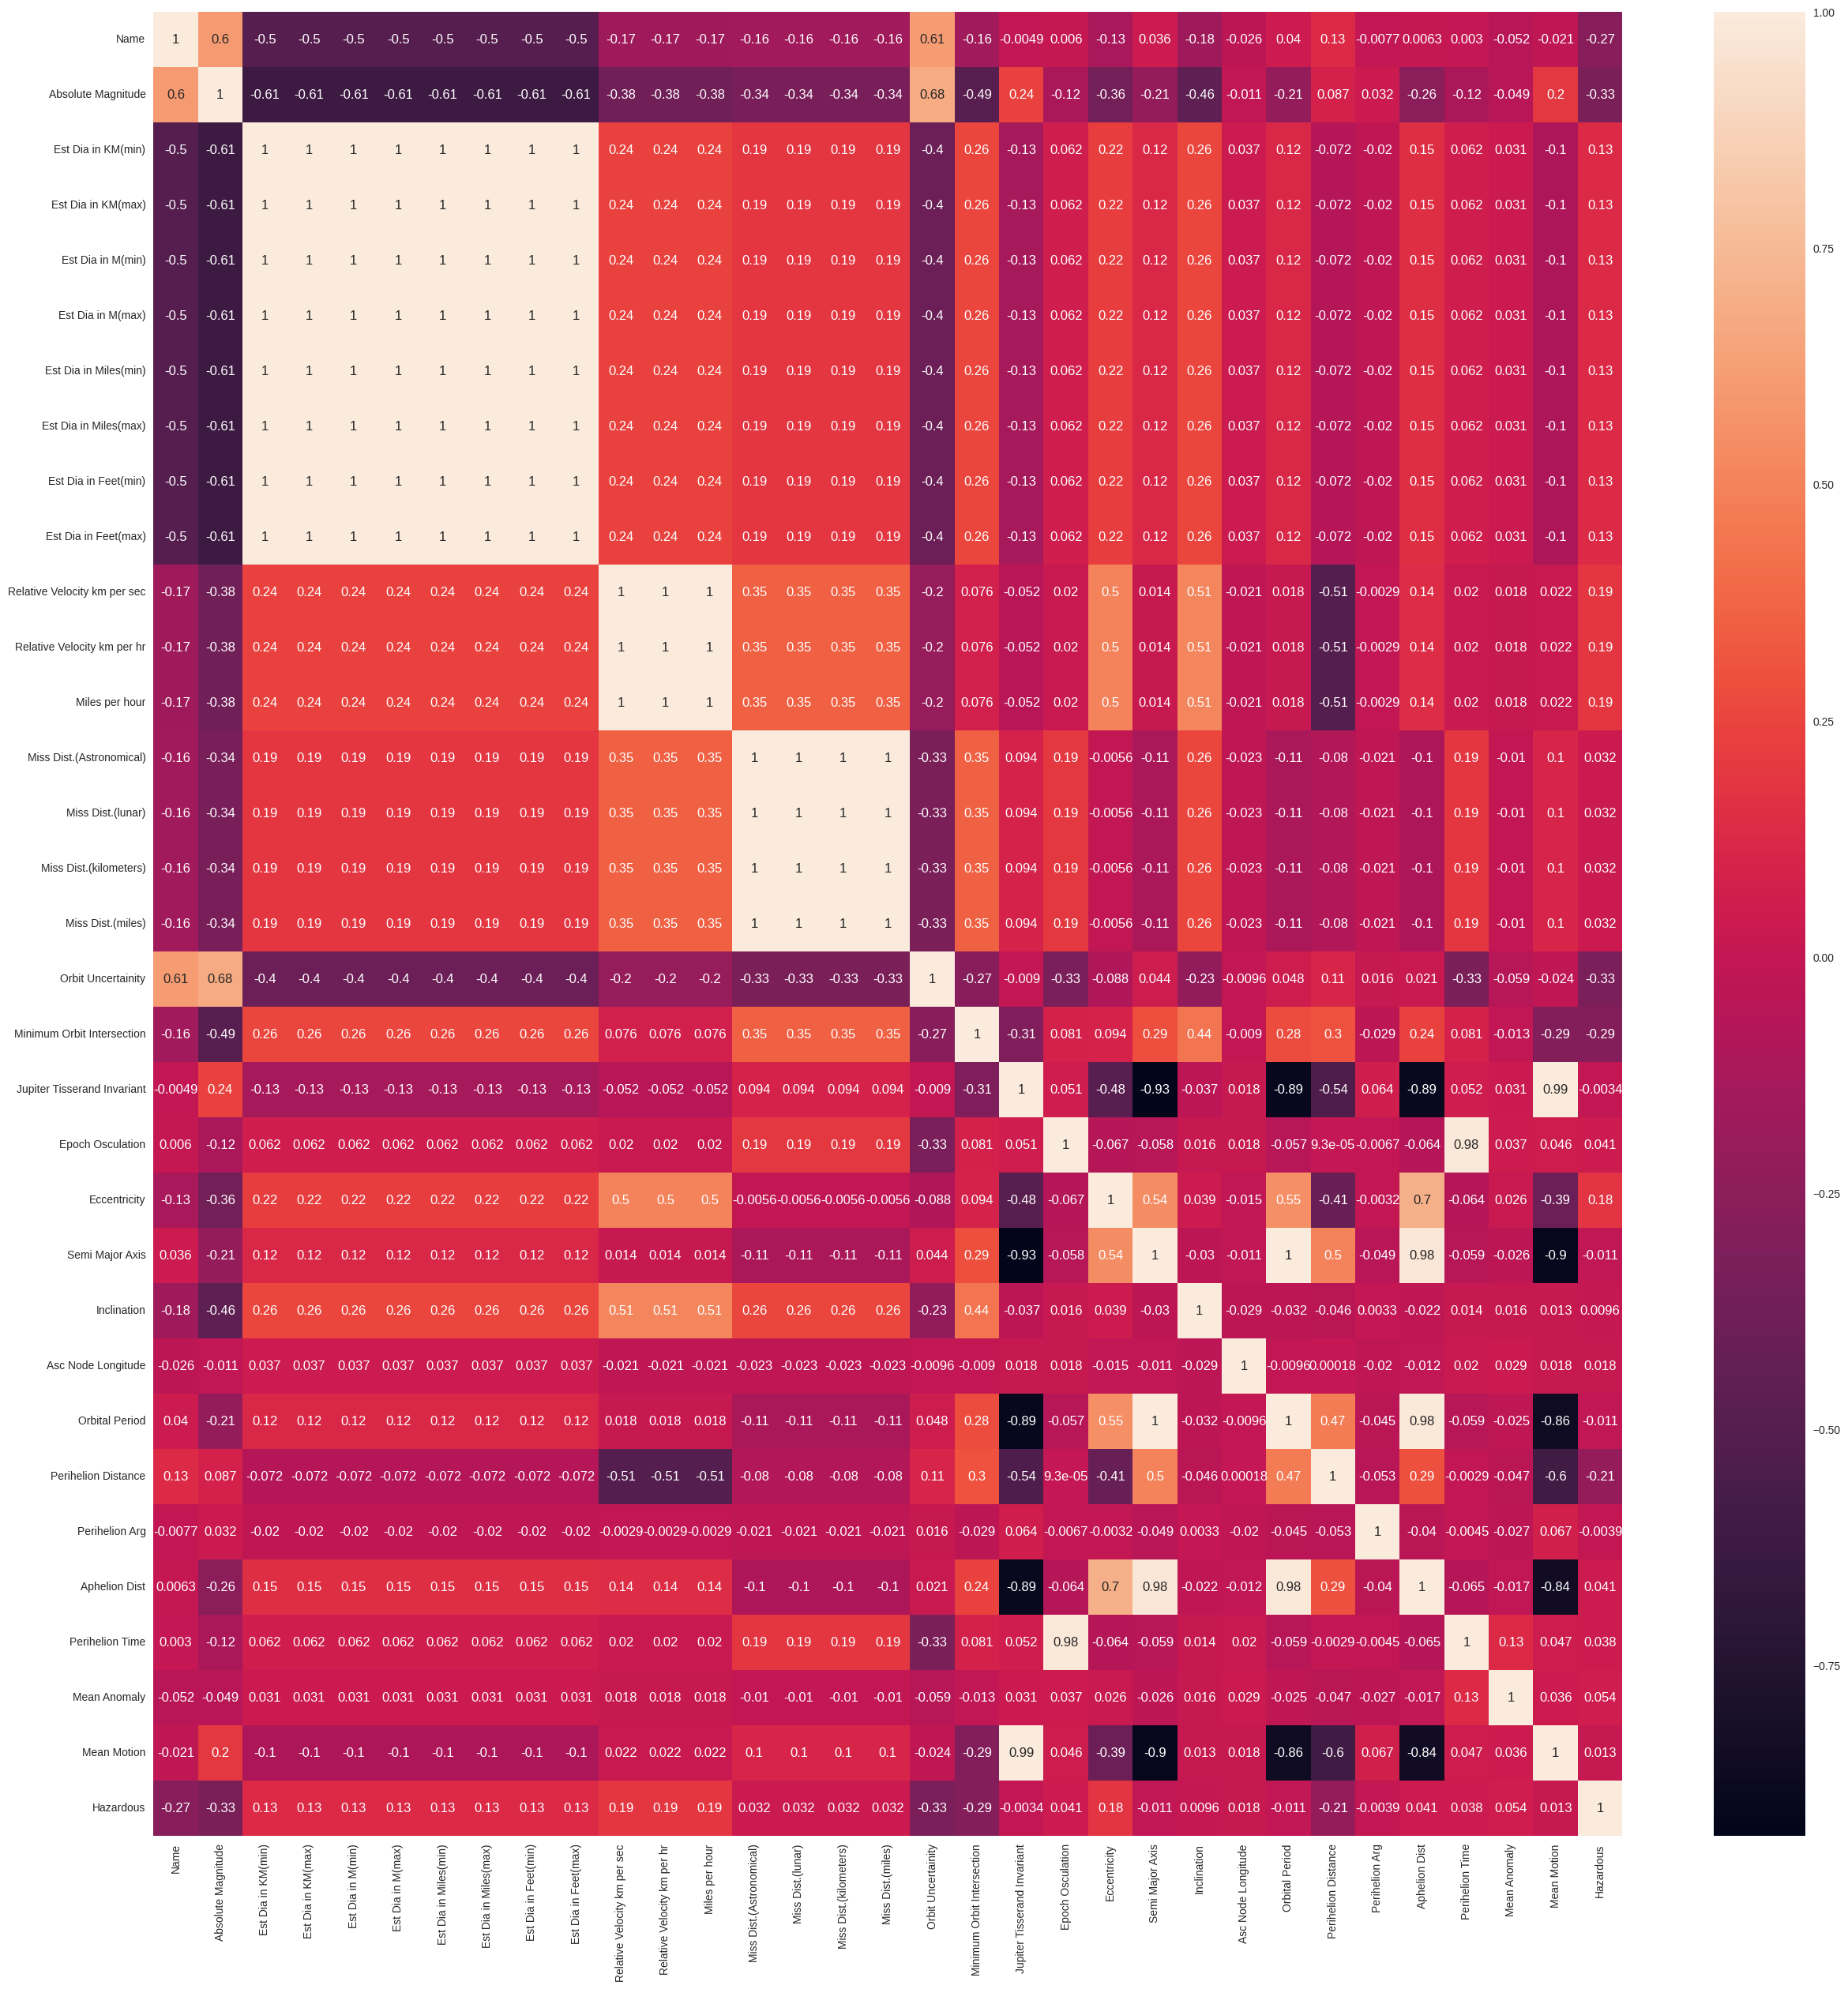

In [23]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_nasa.corr(),annot =True)

<AxesSubplot:>

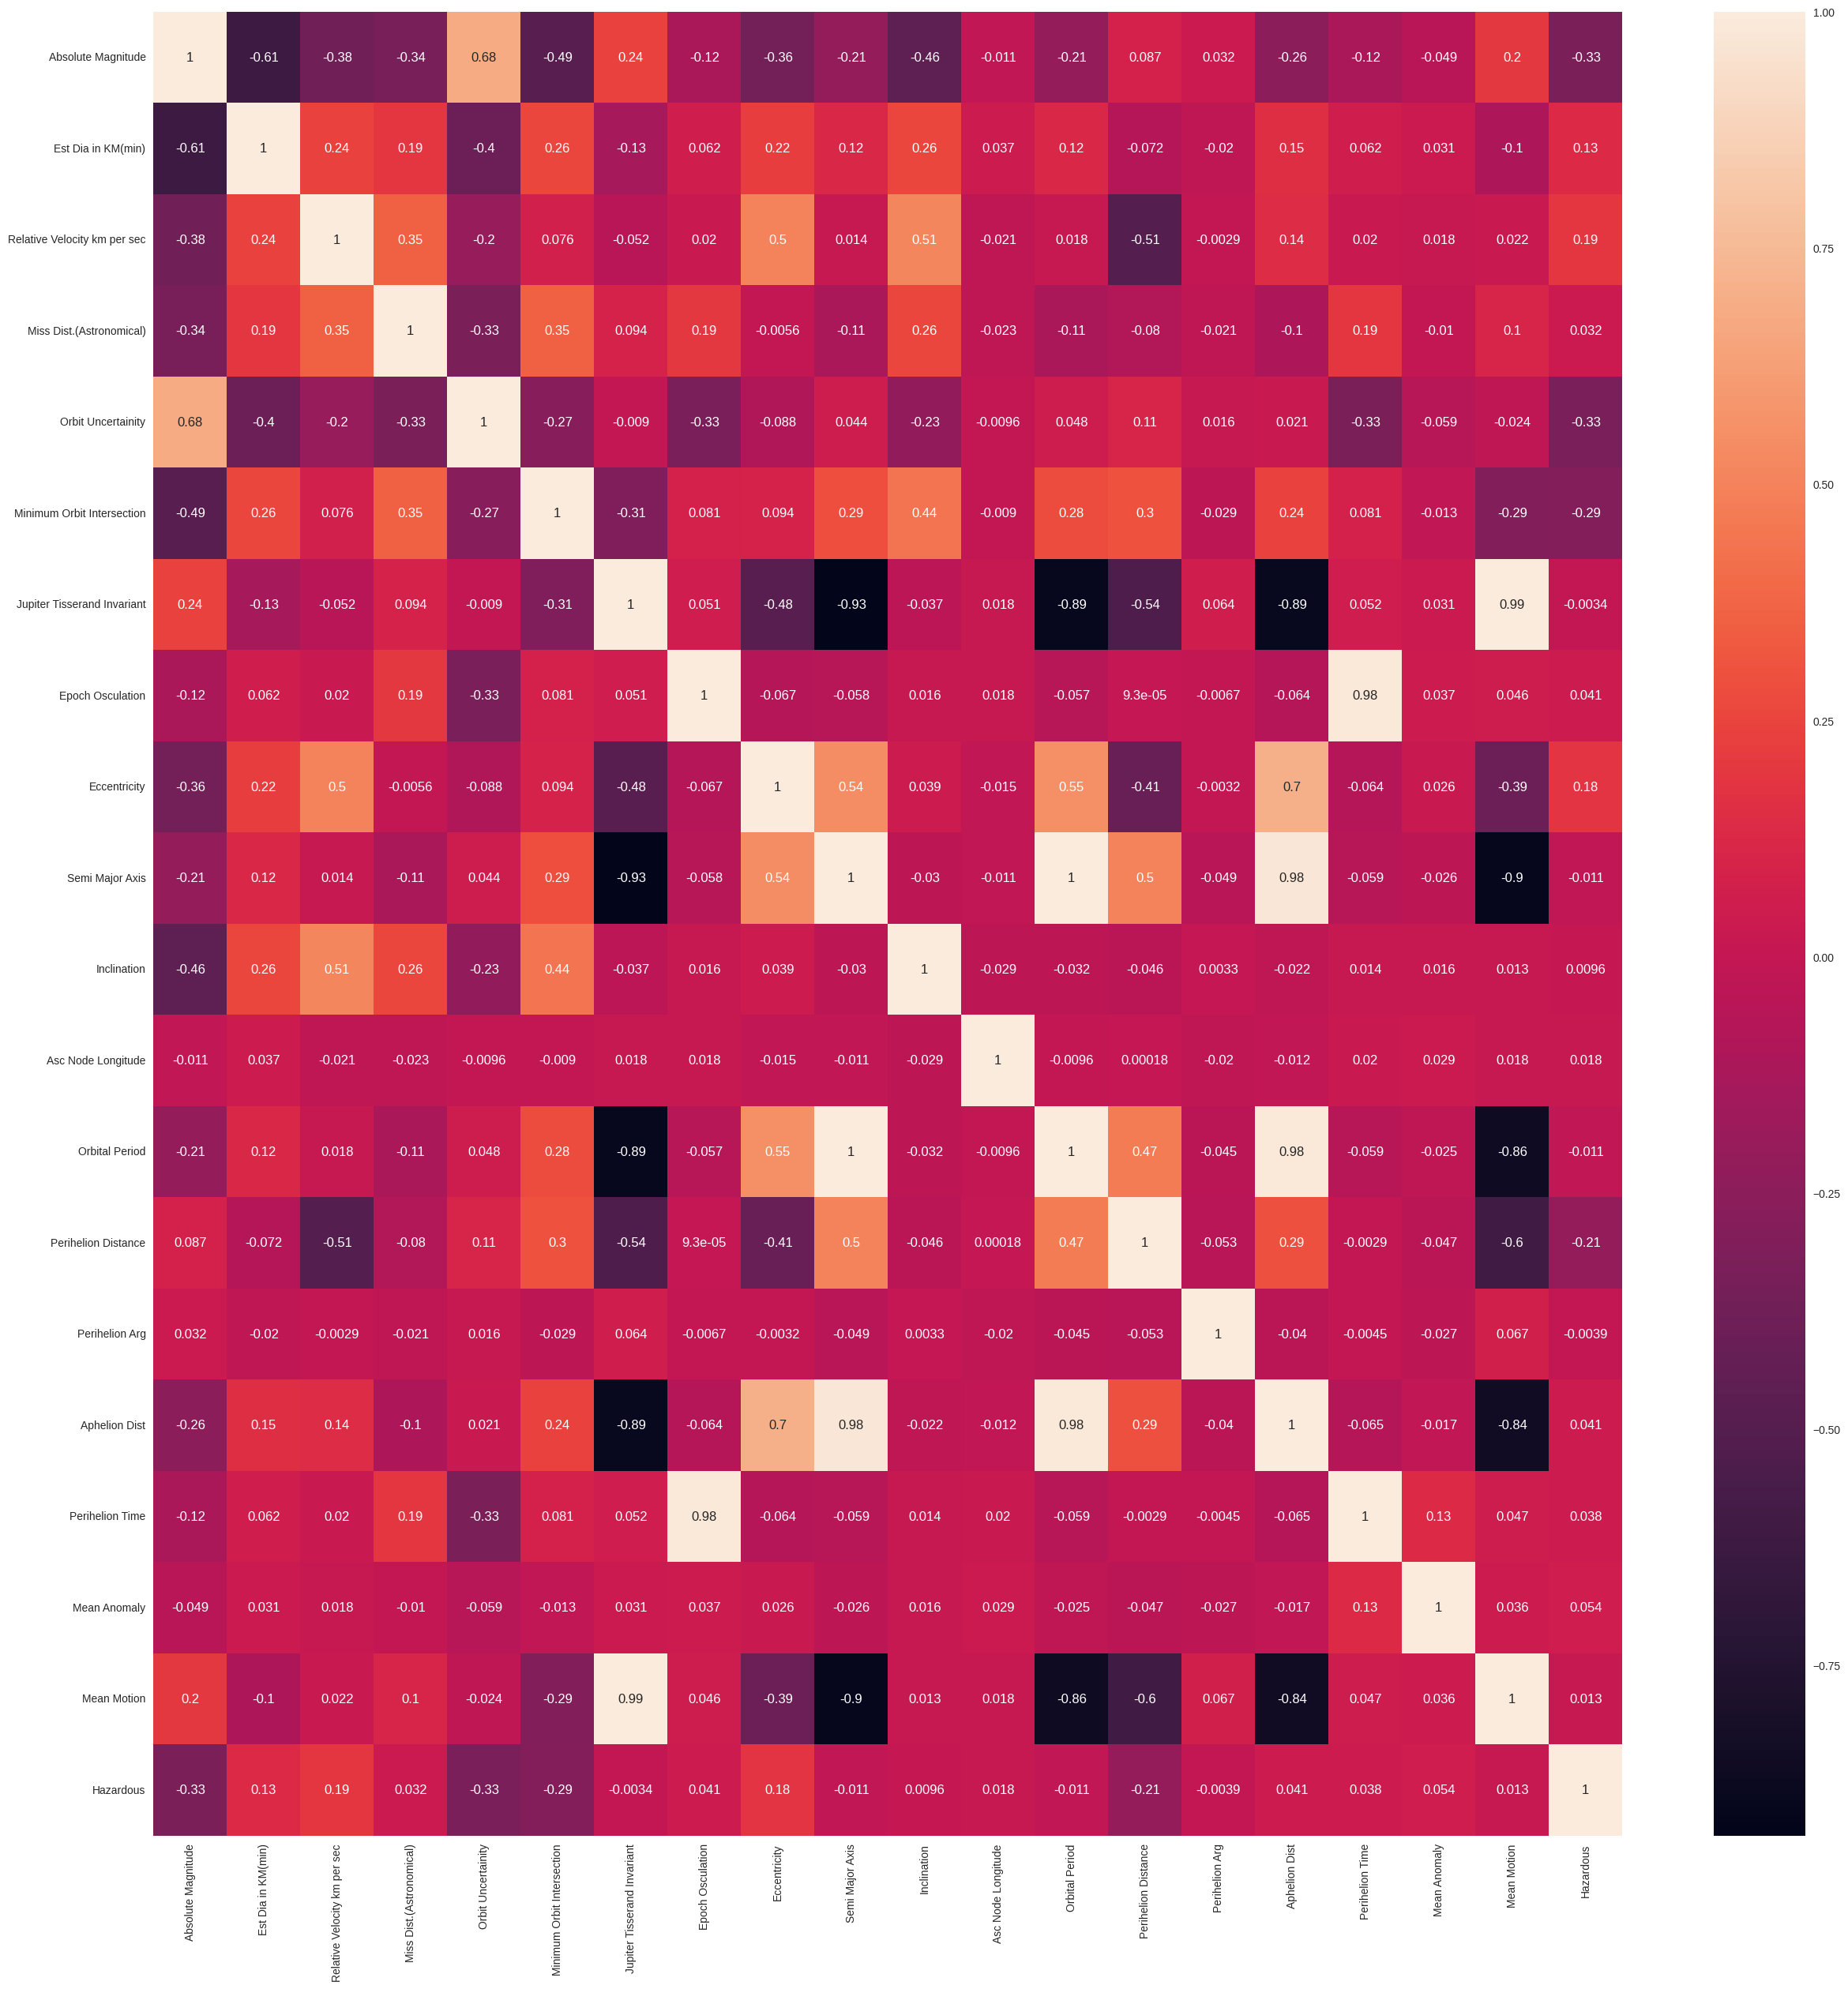

In [24]:
df_nasa.drop(['Name', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', \
            'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per hr', 'Miles per hour', \
            'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)'], axis = 1, inplace=True)
plt.figure(figsize=(30, 30))
sns.heatmap(df_nasa.corr(),annot =True)

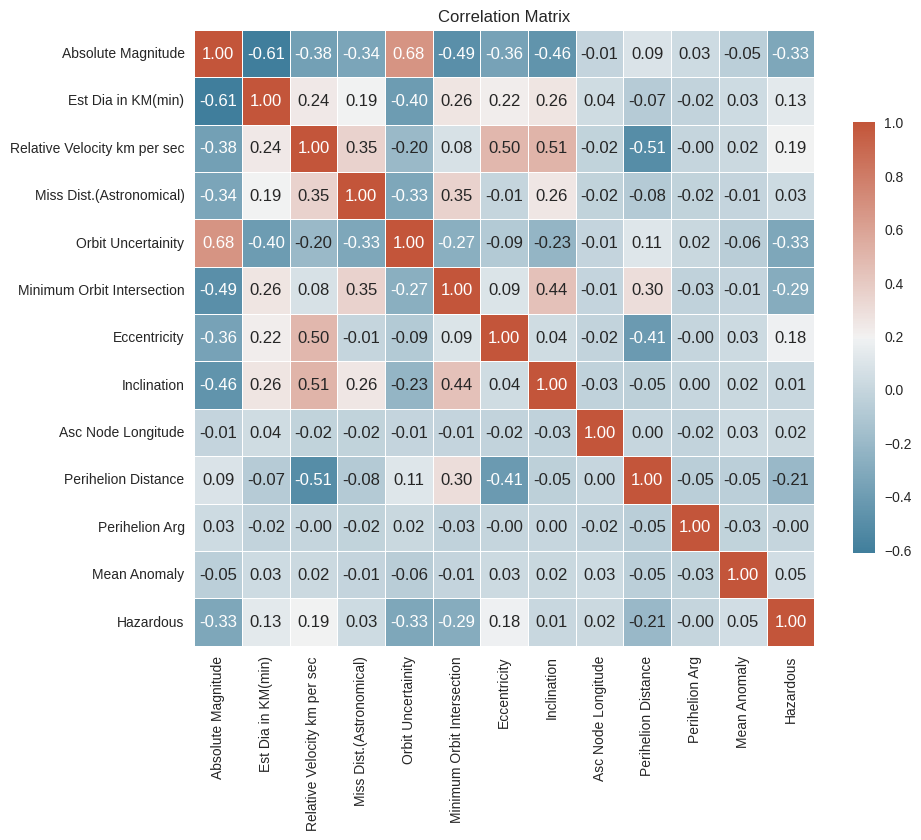

In [25]:
corr = df_nasa.corr()
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(raw, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.7})
plt.title("Correlation Matrix")
plt.show()

In [26]:
columns_to_drop = raw.columns.tolist()
df_nasa_dropped = df_nasa.drop(columns=columns_to_drop, axis=1)
df_nasa

Absolute Magnitude  Est Dia in KM(min)  Relative Velocity km per sec  \
0                 21.600            0.127220                      6.115834   
1                 21.300            0.146068                     18.113985   
2                 20.300            0.231502                      7.590711   
3                 27.400            0.008801                     11.173874   
4                 21.600            0.127220                      9.840831   
...                  ...                 ...                           ...   
4682              23.900            0.044112                     22.154265   
4683              28.200            0.006089                      3.225150   
4684              22.700            0.076658                      7.191642   
4685              21.800            0.116026                     11.352090   
4686              19.109            0.400641                     35.946852   

      Miss Dist.(Astronomical)  Orbit Uncertainity  \
0                     0.419483                   5   
1                     0.383014                   3   
2                     0.050956                   0   
3                     0.285322                   6   
4                     0.407832                   1   
...                        ...                 ...   
4682                  0.041361                   8   
4683                  0.006469                   6   
4684                  0.061009                   6   
4685                  0.260760                   5   
4686                  0.462372                   6   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  \
0                       0.025282                        4.634   
1                       0.186935                        5.457   
2                       0.043058                        4.557   
3                       0.005512                        5.093   
4                       0.034798                        5.154   
...                          ...                          ...   
4682                    0.019777                        5.156   
4683                    0.006451                        5.742   
4684                    0.059972                        4.410   
4685                    0.177510                        4.477   
4686                    0.051777                        4.108   

      Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  \
0            2458000.5      0.425549         1.407011     6.025981   
1            2458000.5      0.351674         1.107776    28.412996   
2            2458000.5      0.348248         1.458824     4.237961   
3            2458000.5      0.216578         1.255903     7.905894   
4            2458000.5      0.210448         1.225615    16.793382   
...                ...           ...              ...          ...   
4682         2457637.5      0.361512         1.161429    39.880491   
4683         2458000.5      0.073200         1.075134     5.360249   
4684         2458000.5      0.368055         1.528234     4.405467   
4685         2458000.5      0.202565         1.486600    21.080244   
4686         2458000.5      0.405642         1.474045    53.574923   

      Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  \
0             314.373913      609.599786             0.808259       57.257470   
1             136.717242      425.869294             0.718200      313.091975   
2             259.475979      643.580228             0.950791      248.415038   
3              57.173266      514.082140             0.983902       18.707701   
4              84.629307      495.597821             0.967687      158.263596   
...                  ...             ...                  ...             ...   
4682          164.183305      457.179984             0.741558      276.395697   
4683          345.225230      407.185767             0.996434       42.111064   
4684           37.026468      690.054279             0.965760      27

In [27]:
target_haz = df_nasa.Hazardous
df_class = df_nasa.drop(['Hazardous'], axis=1)
df_class_transformed = pd.DataFrame(min_max_sc.fit_transform(df_class))
tX, vX, tY, vY = train_test_split(df_class_transformed, target_haz, train_size=0.8, random_state=0)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

logreg = LogisticRegression(random_state=0).fit(tX, tY)
xbg = XGBClassifier().fit(tX, tY)
neigh = KNeighborsClassifier(n_neighbors=3).fit(tX, tY)
svc = SVC(gamma='auto').fit(tX, tY)
logreg_pred = logreg.predict(vX)
xbg_pred = xbg.predict(vX)
neigh_pred = neigh.predict(vX)
svc_pred = svc.predict(vX)

In [29]:
print(accuracy_score(logreg_pred, vY))
print(accuracy_score(xbg_pred, vY))
print(accuracy_score(neigh_pred, vY))
print(accuracy_score(svc_pred, vY))

0.9189765458422174
0.9936034115138592
0.8859275053304904
0.8656716417910447


Confusion matrix for Logistic Regression:
[[773  20]
 [ 56  89]]

Confusion matrix for XGBoost:
[[792   1]
 [  5 140]]

Confusion matrix for K-Nearest Neighbors:
[[756  37]
 [ 70  75]]

Confusion matrix for SVC:
[[792   1]
 [125  20]]



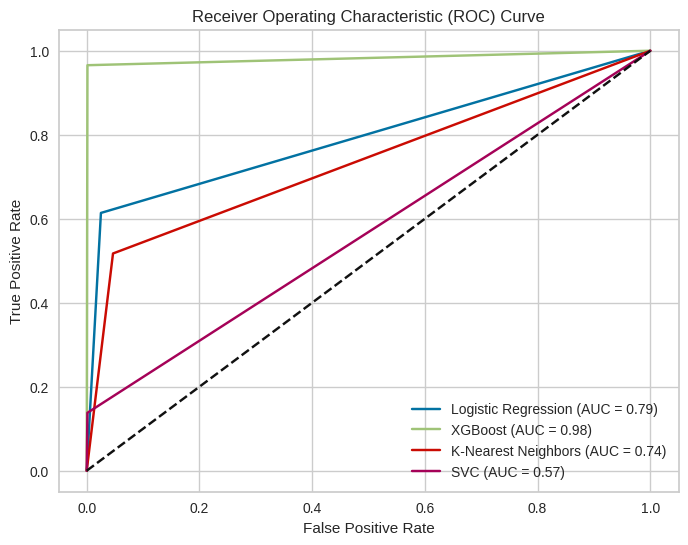

In [30]:
classifiers = ['Logistic Regression', 'XGBoost', 'K-Nearest Neighbors', 'SVC']
predictions = [logreg_pred, xbg_pred, neigh_pred, svc_pred]

for clf, pred in zip(classifiers, predictions):
    cm = confusion_matrix(vY, pred)
    print(f"Confusion matrix for {clf}:\n{cm}\n")

plt.figure(figsize=(8, 6))
for clf, pred in zip(classifiers, predictions):
    fpr, tpr, _ = roc_curve(vY, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{clf} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()